## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import datetime as dt 

## Чтение данных

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

## Исследование данных

### Таблица покупателей

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.shape

(99441, 5)

In [5]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [6]:
customers\
.groupby('customer_unique_id', as_index=False)\
.agg({'customer_id':'count'})\
.sort_values('customer_id', ascending=False)

,customer_unique_id,customer_id
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,1
32507,5657596addb4d7b07b32cd330614bdf8,1
32506,5656eb169546146caeab56c3ffc3d268,1
32505,5656a8fabc8629ff96b2bc14f8c09a27,1


Пока просто смотрю на данные. Сгруппировала, чтобы убедиться, что верно понимаю смысл уникальных идентификаторов и позаказных. Исходя из результатов группировки, вижу, что уникальных пользователей у нас 96096, а не 99441, как могло показаться сразу после чтения файла.

___

### Общая таблица заказов

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders.shape

(99441, 8)

In [9]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Все признаки имеют тип данных object, что не позволит нам работать с датами, поэтому поменяем сразу у всех дат типа данных

In [10]:
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date)
orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)

In [11]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [12]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Теперь с датами все ок. Взглянем на описательные характеристики временных колонок

In [13]:
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence thi

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
count,99441,99281,97658,96476
unique,98875,90733,81018,95664
top,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44
freq,3,9,47,3
first,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32
last,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46


 так мы прикинули период, за который исследуем данные - с сентября 2016 по октябрь 2018

Посмотрим, что из себя представляет статус заказа - сколько и какие бывают. Сгруппируем и посчитаем

In [14]:
orders\
.groupby('order_status', as_index=False)\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'orders'})\
.sort_values('orders', ascending=False)

,order_status,orders
3,delivered,96478
6,shipped,1107
1,canceled,625
7,unavailable,609
4,invoiced,314
5,processing,301
2,created,5
0,approved,2


Судя по всему, в таблице есть:
- незавершенные заказы (со статусами "создан", "подтвержден", "выставлен счет") - то есть те, которые еще могут получить статус совершенной покупки, но пока явно до него не дошли
- заказы, которые уже оплачены, но еще не приехали к покупателю (со статусами "в процессе сборки заказа", "отгружен со склада") 
- заказы, которые не будут завершены (со статусами "недоступен" и "отменен") - отмененные заказы тоже нужно посмотреть - на каких этапах отменяются
- завершенные заказы (со статусом "доставлен пользователю") - нужно еще проверить, когда проходит оплата - до доставки или после.

Чтобы решить, что считать покупкой, нужно обратить внимание на признак **order_approved_at** - по сути одного этого признака уже могло бы хватить, чтобы считать покупку состоявшейся. Но хочется проверить, бы ли оплаченные, но так и не доставленные заказы (отмененные после оплаты, не отгруженные и тп.)

Попробуем посмотреть на все статусы отдельно

In [15]:
orders_canceled = orders.query('order_status == "canceled"')
orders_canceled

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [16]:
print('Оплатили, но отменили - ', orders_canceled[orders_canceled.order_approved_at.notna()].shape[0])
print('Оплатили, заказ передан в доставку, но отменили -', orders_canceled[orders_canceled.order_delivered_carrier_date.notna()].shape[0])
print('Оплатили, заказ передан в доставку, доставлен, но отменили -', orders_canceled[orders_canceled.order_delivered_customer_date.notna()].shape[0])

Оплатили, но отменили -  484
Оплатили, заказ передан в доставку, но отменили - 75
Оплатили, заказ передан в доставку, доставлен, но отменили - 6


Из результатов исследования ясно, что даже доставленные заказы нельзя считать покупкой, поскольку даже некоторые из доставленных были отменены. Из общих данных не видно, что происходит с этими заказами дальше. Но могу предположить, что идет возврат товара и оплаты, а значит, расходы на логистику есть, а дохода нет - такие заказы нельзя учитывать, как покупку. То есть одним из условий покупки будет order_status != 'canceled'

Теперь посмотрим на оплаченный заказы

In [17]:
orders_paid = orders[orders.order_approved_at.notna()]
print('Оплатили - ', orders_paid.shape[0])
print('Оплатили, но не доставили - ', orders_paid[orders_paid.order_delivered_customer_date.isna()].shape[0])

Оплатили -  99281
Оплатили, но не доставили -  2819


Среди тех, кто оплатили, есть много тех, кому не доставили заказ. Посмотрим на статусы таких заказов

In [18]:
orders_paid_not_delivered = orders_paid[orders_paid.order_delivered_customer_date.isna()]
orders_paid_not_delivered.groupby('order_status', as_index=False).agg({'order_id':'count'})

,order_status,order_id
0,approved,2
1,canceled,478
2,delivered,8
3,invoiced,314
4,processing,301
5,shipped,1107
6,unavailable,609


Странно, но в оплаченные и недоставленные заказы попали практически все статусы. Кроме того...

In [19]:
orders_paid_not_delivered.query('order_status =="delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


 8 заказов имеет статус delivered - то есть "доставлен пользователю", однако дата доставки не указана, а у одного из них не указана даже дата передачи логистам. Когда же возникает статус delivered, если не после доставки пользователю? Возможно, по предполагаемой дате? Проверим...

In [20]:
orders_est_deliv_date = orders[orders.order_estimated_delivery_date.notna()]
orders_est_deliv_date\
.groupby('order_status', as_index=False)\
.agg({'order_id':'count'})\
.sort_values('order_id', ascending=False)

,order_status,order_id
3,delivered,96478
6,shipped,1107
1,canceled,625
7,unavailable,609
4,invoiced,314
5,processing,301
2,created,5
0,approved,2


In [21]:
orders_est_deliv_date.shape[0]

99441

Вывод - предполагаемая дата доставки вообще ни о чем не говорит. Она имеется даже у только что созданных заказов. На нее никак нельзя ориентироваться. Остается только считать, что статус заказа - это в целом не очень надежный признак. Единственное, что из него можно взять - это признак отменен заказ или нет.

А есть ли такие заказы, которые были доставлены, но не были оплачены?

In [22]:
print('Не оплаченные, но доставленные заказы - ', orders[orders.order_approved_at.isna() & orders.order_delivered_customer_date.notna()].shape[0])

Не оплаченные, но доставленные заказы -  14


Значит, отдельно признак доставки покупателю заказа тоже не является достаточным. 

Посмотрим еще на статус "недоступен" - есть ли среди этих статусов оплаченные и доставленные заказы

In [23]:
orders_unavailable = orders.query('order_status == "unavailable"')
print('Оплаченных среди недоступных', orders_unavailable[orders_unavailable.order_approved_at.notna()].shape[0])
print('Доставленных среди недоступных', orders_unavailable[orders_unavailable.order_delivered_customer_date.notna()].shape[0])

Оплаченных среди недоступных 609
Доставленных среди недоступных 0


Теперь понятно, что одного признака мало для того, чтобы считать заказ покупкой.

Итак за покупку принимаю следующие условия:
- order_status != 'canceled'
- order_status != 'unavailable'
- order_approved_at.notna()
- order_delivered_customer_date.notna()


То есть заказ оплачен, доступен, не отменен и доставлен. 

___

### Таблица товаров по заказам

In [24]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
order_items.shape

(112650, 7)

In [26]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Все типы данных, кроме даты ок. дату поправим

In [27]:
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date)

In [28]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [29]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Посмотрели бегло на данные - оценили min и max цены и веса товара, среднее и т.п.

___

## Ответы на вопросы

___

### 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для начала вспомним условия, прикоторых мы считаем транзакцию покупкой:
- order_status != 'canceled'
- order_status != 'unavailable'
- order_approved_at.notna()
- order_delivered_customer_date.notna()

Теперь создадим датафрейм, в который войдут только покупки

In [30]:
purchases = orders[(orders.order_status != 'canceled') & 
                   (orders.order_status != 'unavailable') & 
                   (orders.order_approved_at.notna()) &
                   (orders.order_delivered_customer_date.notna())]
purchases

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


Нужно поженить эту таблицу с покупателями

In [31]:
purchases_customers = pd.merge(left=purchases, right=customers, on='customer_id')
purchases_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
96451,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
96452,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
96453,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
96454,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


Теперь сгруппируем по покупателям и посчитаем количество их заказов, возьмем только тех, у кого это колоичество равно 1

In [32]:
purchases_customers\
.groupby('customer_unique_id', as_index=False)\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'orders'})\
.query('orders == 1')

,customer_unique_id,orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,1
93333,fffea47cd6d3cc0a88bd621562a9d061,1
93334,ffff371b4d645b6ecea244b27531430a,1
93335,ffff5962728ec6157033ef9805bacc48,1


**Ответ: 90537 покупателей совершили покупку только 1 раз**

___

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Сначала нужно сделать новый признак - месяц, чтобы потом по нему провести группировку.

In [33]:
orders['month'] = orders.order_approved_at.dt.to_period('M')

Теперь возьмем только те, которые не были доставлены и сгруппируем по месяцу и статусу

In [34]:
orders_by_month_not_deliv = orders.query('order_delivered_customer_date.isna()')\
.groupby('month', as_index=False)\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'not_delivered'})
orders_by_month_not_deliv

,month,not_delivered
0,2016-10,50
1,2017-01,45
2,2017-02,127
3,2017-03,135
4,2017-04,96
5,2017-05,146
6,2017-06,109
7,2017-07,146
8,2017-08,131
9,2017-09,131


In [35]:
print('Ответ: ', round(orders_by_month_not_deliv.not_delivered.mean(),2), 'заказов в месяц в среднем не доставляется')

Ответ:  128.14 заказов в месяц в среднем не доставляется


Еще нам нужна детализация по причинам. Что может быть причиной недоставки? Первое, что приходит в голову - проверить статусы заказов

In [36]:
orders_by_status_not_deliv = orders.query('order_delivered_customer_date.isna()')\
.groupby('order_status', as_index=False)\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'not_delivered'})
orders_by_status_not_deliv

,order_status,not_delivered
0,approved,2
1,canceled,619
2,created,5
3,delivered,8
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [37]:
orders_by_status_not_deliv.not_delivered.sum()

2965

Мы видим, что больше трети заказов уже отправлено, но пока не доставлено - вероятно, для доставки требуется время. Кроме того, есть еще не обработанные заказы, которые еще пройдут обработку. Ну, и те, которые уже и не будут доставлены - недоступные и отмененные - около трети всех недоставленных заказов

Ну, и опять же 8 заказов со статусом "доставлено", но у которых нет даты доставки

И теперь попробуем посчитать именно среднее за месяц по каждой причине. 

In [38]:
orders_by_status_month_not_deliv = orders.query('order_delivered_customer_date.isna()')\
.groupby(['order_status', 'month'], as_index=False)\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'not_delivered'})\
.groupby(['order_status'],as_index=False)\
.agg({'not_delivered':'mean'}).round()
orders_by_status_month_not_deliv

,order_status,not_delivered
0,approved,1.0
1,canceled,23.0
2,delivered,2.0
3,invoiced,15.0
4,processing,16.0
5,shipped,50.0
6,unavailable,29.0


Так мы получили средние в месяц с детализацией по причинам

Попробуем визуализировать данные о недоставленных заказах по месяцам и причинам

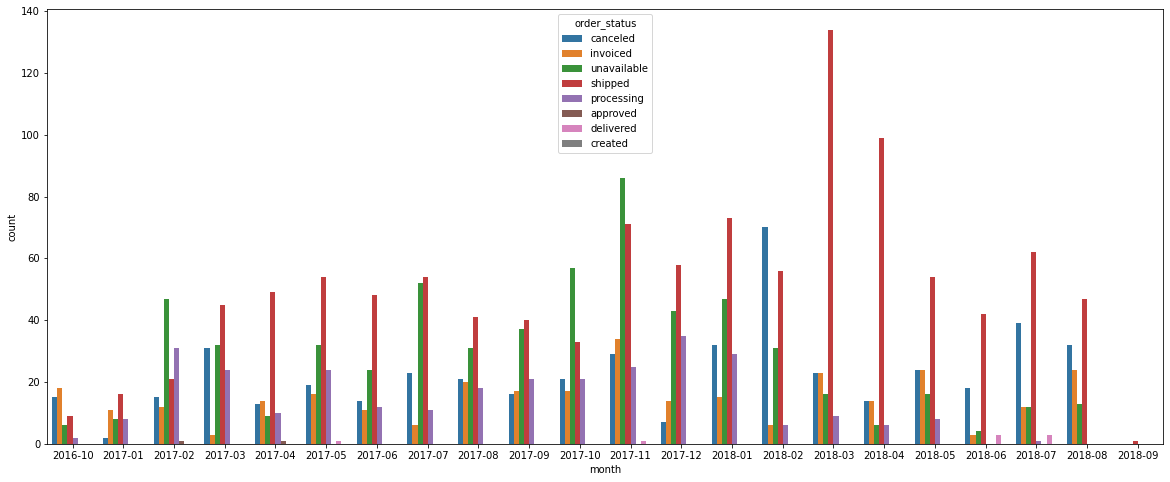

In [39]:
not_delivered = orders[orders.order_delivered_customer_date.isna()].sort_values('month')
plt.figure(figsize=(20,8))
sns.countplot(x='month', hue='order_status', data=not_delivered)

В большинстве своем главная причина - ЕЩЕ недоставлено, но скоро будет - то есть уже отгружено

___

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

Создаем новый признак - день недели по дате оплаты заказа

In [40]:
orders['day_of_week'] = orders.order_approved_at.dt.day_name()

Тут важно определить, что имеется ввиду в вопросе - покупается - то есть просто по всем заказам, в какой день проходят оплаты - в этом случае будет объединять таблицы по товарами и по заказам. Если же речь о совершенной готовой покупке, то товары объединяем с покупками.

#### 1. По всем заказам

In [41]:
product_orders = pd.merge(left=order_items, right=orders, on='order_id')
product_orders

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,day_of_week
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-04,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018-01,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018-08,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017-02,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,2018-04,Wednesday
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,2018-07,Tuesday
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,2017-10,Tuesday
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,2017-08,Tuesday


Сгруппируем данные по product_id и дням недели и посчитаем заказы

In [42]:
po_all = product_orders\
.groupby(['product_id', 'day_of_week'], as_index=False)\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'orders'})\
.sort_values('orders', ascending=False)
po_all

,product_id,day_of_week,orders
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
41077,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,96
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
41083,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,89
...,...,...,...
23986,63ee501f72520d5ec54cef5fd3a21a20,Wednesday,1
23988,63f4d40c05db6ade462cecef857eec34,Monday,1
23990,63f4d40c05db6ade462cecef857eec34,Wednesday,1
23991,63f52009dc3ddb733394e80183aed0f0,Saturday,1


Но нас интересуют только те дни, в которых у товара был максимум по заказам. Аггрегируем результаты по максимуму

In [43]:
po_max = po_all.groupby('product_id', as_index=False)\
.agg({'orders':'max'})\
.sort_values('orders', ascending=False)
po_max

,product_id,orders
22110,aca2eb7d00ea1a7b8ebd4e68314663af,119
10865,53b36df67ebb7c41585e8d54d6772e08,105
8612,422879e10f46682990de24d770e7f83d,89
19740,99a4788cb24856965c36a24e339b6058,82
7078,368c6c730842d78016ad823897a372db,80
...,...,...
12728,62874f62bbdeec35f7cd827b1716c47e,1
12727,628677036f276f6c0792cded8e9211ee,1
12726,6281a79f478d260d81da138f7e03c0bb,1
12725,627dce1ab24323cb7ac147cad5ac0b8c,1


Но теперь нужно добавить еще сами дни недели. Для этого объединим таблички по product_id и по количеству заказов

In [44]:
po_max_dow = pd.merge(left=po_max, right=po_all, on=['product_id', 'orders'])
po_max_dow

,product_id,orders,day_of_week
0,aca2eb7d00ea1a7b8ebd4e68314663af,119,Tuesday
1,53b36df67ebb7c41585e8d54d6772e08,105,Tuesday
2,422879e10f46682990de24d770e7f83d,89,Tuesday
3,99a4788cb24856965c36a24e339b6058,82,Tuesday
4,368c6c730842d78016ad823897a372db,80,Thursday
...,...,...,...
42621,628677036f276f6c0792cded8e9211ee,1,Wednesday
42622,6281a79f478d260d81da138f7e03c0bb,1,Friday
42623,6281a79f478d260d81da138f7e03c0bb,1,Thursday
42624,627dce1ab24323cb7ac147cad5ac0b8c,1,Friday


Некоторые продукты отображаются в таблице несколько раз - это потому что у этих товаров несколько одинаковых показателей по дням.

#### 2. По покупкам

Все те же действия проводим с таблицей purchases - по покупкам

In [45]:
purchases['day_of_week'] = purchases.order_approved_at.dt.day_name()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
product_purchases = pd.merge(left=order_items, right=purchases, on='order_id')
product_purchases

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day_of_week
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110169,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,Wednesday
110170,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,Tuesday
110171,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,Tuesday
110172,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,Tuesday


In [47]:
po_all_2 = product_purchases\
.groupby(['product_id', 'day_of_week'], as_index=False)\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'orders'})\
.sort_values('orders', ascending=False)
po_all_2

,product_id,day_of_week,orders
40187,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
19707,53b36df67ebb7c41585e8d54d6772e08,Tuesday,104
40182,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,92
15607,422879e10f46682990de24d770e7f83d,Tuesday,89
40188,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,87
...,...,...,...
23488,640fcadaeb5f06f26d6b07d366cebd34,Saturday,1
23489,6410668313e664e438837bf86363fcb9,Friday,1
23490,64118e924b5de8663f5cb1caad0abff8,Monday,1
23491,64123627d4116a2bc8284f1bc0a257f3,Saturday,1


In [48]:
po_max_2 = po_all_2.groupby('product_id', as_index=False)\
.agg({'orders':'max'})\
.sort_values('orders', ascending=False)
po_max_2

,product_id,orders
21613,aca2eb7d00ea1a7b8ebd4e68314663af,119
10613,53b36df67ebb7c41585e8d54d6772e08,104
8427,422879e10f46682990de24d770e7f83d,89
6924,368c6c730842d78016ad823897a372db,80
19287,99a4788cb24856965c36a24e339b6058,78
...,...,...
12448,628d0ba951ebb8fd1edc5ab3934468e0,1
12447,628cfb8a45c95a7b796ea06b006e9384,1
12445,628b17449083fb34688b2959b80bdecd,1
12444,62892a47bea324c325a4556b66baef9d,1


In [49]:
po_max_dow_2 = pd.merge(left=po_max_2, right=po_all_2, on=['product_id', 'orders'])
po_max_dow_2

,product_id,orders,day_of_week
0,aca2eb7d00ea1a7b8ebd4e68314663af,119,Tuesday
1,53b36df67ebb7c41585e8d54d6772e08,104,Tuesday
2,422879e10f46682990de24d770e7f83d,89,Tuesday
3,368c6c730842d78016ad823897a372db,80,Thursday
4,99a4788cb24856965c36a24e339b6058,78,Tuesday
...,...,...,...
41609,628b17449083fb34688b2959b80bdecd,1,Friday
41610,628b17449083fb34688b2959b80bdecd,1,Wednesday
41611,62892a47bea324c325a4556b66baef9d,1,Friday
41612,62892a47bea324c325a4556b66baef9d,1,Thursday


Таблицы по товарам по дням недели отличаются примерно на тысячу строк, если брать не все заказы, а только те, которые считаем покупками

___

### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

Сначала создадим новый признак - week и month для таблицы с покупками и покупателями

In [50]:
purchases_customers['week'] = purchases_customers.order_approved_at.dt.isocalendar().week
purchases_customers['month'] = purchases_customers.order_approved_at.dt.to_period('M')
purchases_customers

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,week,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,40,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,30,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,32,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,46,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,7,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96451,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,10,2017-03
96452,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,6,2018-02
96453,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,34,2017-08
96454,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,2018-01


Теперь сгруппируем по customer_unique_id, месяцам и неделям

In [51]:
purchases_customers.groupby(['customer_unique_id', 'month','week'], as_index=False)\
.agg({'order_id':'count'})\
.rename(columns={'order_id':'orders'})\
.sort_values('orders', ascending=False)\
.groupby(['customer_unique_id', 'month'], as_index=False)\
.agg({'orders':'mean'})\
.sort_values('orders', ascending=False)

,customer_unique_id,month,orders
7100,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6.0
14054,25a560b9a6006157838aab1bdbd68624,2017-04,4.0
74542,c8460e4251689ba205045f3ea17884a1,2018-08,4.0
49114,83e7958a94bd7f74a9414d8782f87628,2017-01,4.0
78814,d3882d7abd0c66064d740d7ed04dd1ef,2018-02,3.0
...,...,...,...
31848,5584edcd8b074bbd87e159db19a12525,2018-02,1.0
31847,55845d91497951227fd70e450ffb35e0,2017-02,1.0
31846,55840dd9a1ca54d819ce02d06bacde82,2018-05,1.0
31845,55836600036b58714e3e52f3921fc36d,2018-05,1.0


После основной группировки я еще раз сгруппировала уже по пользователю и месяцу, и применила функцию среднего в аггрегации.

___

### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Для начала сформируем датафрейм, который будет содержать только нужное нам:
- только покупки
- за период 2017 (только в этом году представлены все месяцы с января по декабрь)
- уникальные id покупателей

За основу можно взять датасет purchases_customers, удалив из него лишнее.

In [52]:
data_cohort = purchases_customers[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]\
.query('order_purchase_timestamp.dt.year > 2016 and order_purchase_timestamp.dt.year < 2018')\
.sort_values('order_purchase_timestamp')
data_cohort

,customer_unique_id,order_id,order_purchase_timestamp
76411,f7b981e8a280e455ac3cbe0d5d171bd1,ec7a019261fce44180373d45b442d78f,2017-01-05 11:56:06
15740,83e7958a94bd7f74a9414d8782f87628,b95a0a8bd30aece4e94e81f0591249d8,2017-01-05 12:01:20
72438,728e4a7d0db4845270091ded0923c71f,38bcb524e1c38c2c1b60600a80fc8999,2017-01-05 12:06:36
14912,728e4a7d0db4845270091ded0923c71f,7a18a504c1a4b32d883e68de2e1a7db0,2017-01-05 12:09:08
26203,728e4a7d0db4845270091ded0923c71f,6acecf438369055d9243e121045cca74,2017-01-05 12:11:23
...,...,...,...
61749,e6797b7d4c35624ef13982ab27d3255b,60d98124c3228470422ecadff6550e3c,2017-12-31 21:10:02
81200,addd42012ed67639f9e0d26155b7c2e1,43e38490d21c8c490334f75c5a7c2861,2017-12-31 21:17:54
46993,b890928f02ba9a0dfbc6ec8009bee0fd,18f39cbc016f34a22c870ef03cba5641,2017-12-31 22:14:53
38789,5d11f19985edbb3c068e805434a80f87,8acda261d8c76b3206d9cb5279d0a18a,2017-12-31 23:24:10


Параметры когортного анализа:

- Признак формирования когорты: первый заказ
- Размер когорты: месяц
- Отчетный период: 12 месяцев 2017
- Анализируемый ключевой показатель: Retention

Создадим новый признак year_month для определения месяца заказа

In [53]:
data_cohort['year_month'] = data_cohort.order_purchase_timestamp.apply(lambda x: dt.datetime(x.year,x.month,1))
data_cohort

,customer_unique_id,order_id,order_purchase_timestamp,year_month
76411,f7b981e8a280e455ac3cbe0d5d171bd1,ec7a019261fce44180373d45b442d78f,2017-01-05 11:56:06,2017-01-01
15740,83e7958a94bd7f74a9414d8782f87628,b95a0a8bd30aece4e94e81f0591249d8,2017-01-05 12:01:20,2017-01-01
72438,728e4a7d0db4845270091ded0923c71f,38bcb524e1c38c2c1b60600a80fc8999,2017-01-05 12:06:36,2017-01-01
14912,728e4a7d0db4845270091ded0923c71f,7a18a504c1a4b32d883e68de2e1a7db0,2017-01-05 12:09:08,2017-01-01
26203,728e4a7d0db4845270091ded0923c71f,6acecf438369055d9243e121045cca74,2017-01-05 12:11:23,2017-01-01
...,...,...,...,...
61749,e6797b7d4c35624ef13982ab27d3255b,60d98124c3228470422ecadff6550e3c,2017-12-31 21:10:02,2017-12-01
81200,addd42012ed67639f9e0d26155b7c2e1,43e38490d21c8c490334f75c5a7c2861,2017-12-31 21:17:54,2017-12-01
46993,b890928f02ba9a0dfbc6ec8009bee0fd,18f39cbc016f34a22c870ef03cba5641,2017-12-31 22:14:53,2017-12-01
38789,5d11f19985edbb3c068e805434a80f87,8acda261d8c76b3206d9cb5279d0a18a,2017-12-31 23:24:10,2017-12-01


Каждая строка - это одна транзакция. У каждого клиента может быть несколько транзакций. В столбце year_month каждое значение есть первое число месяца, в котором произошел текущий заказ в этой строке. А нам нужно для каждого клиента узнать дату первого его заказа. Добавим еще один столбец. В нем будет минимальная дата для каждого клиента.

Итак мы создаем еще одну колонку cohortMonth, для чего группируем данные по id клиента, берем созданный нами ранее столбец year_month, где месяц его ЛЮБОЙ покупки и через метод transform меняем его на месяц ПЕРВОЙ покупки

Если столбец year_month содержал год и месяц КАЖДОЙ покупки, то столбец cohortMonth содержит год и месяц ПЕРВОЙ покупки клиента

In [54]:
data_cohort['cohortMonth'] = data_cohort.groupby('customer_unique_id')['year_month'].transform('min')
data_cohort

,customer_unique_id,order_id,order_purchase_timestamp,year_month,cohortMonth
76411,f7b981e8a280e455ac3cbe0d5d171bd1,ec7a019261fce44180373d45b442d78f,2017-01-05 11:56:06,2017-01-01,2017-01-01
15740,83e7958a94bd7f74a9414d8782f87628,b95a0a8bd30aece4e94e81f0591249d8,2017-01-05 12:01:20,2017-01-01,2017-01-01
72438,728e4a7d0db4845270091ded0923c71f,38bcb524e1c38c2c1b60600a80fc8999,2017-01-05 12:06:36,2017-01-01,2017-01-01
14912,728e4a7d0db4845270091ded0923c71f,7a18a504c1a4b32d883e68de2e1a7db0,2017-01-05 12:09:08,2017-01-01,2017-01-01
26203,728e4a7d0db4845270091ded0923c71f,6acecf438369055d9243e121045cca74,2017-01-05 12:11:23,2017-01-01,2017-01-01
...,...,...,...,...,...
61749,e6797b7d4c35624ef13982ab27d3255b,60d98124c3228470422ecadff6550e3c,2017-12-31 21:10:02,2017-12-01,2017-12-01
81200,addd42012ed67639f9e0d26155b7c2e1,43e38490d21c8c490334f75c5a7c2861,2017-12-31 21:17:54,2017-12-01,2017-12-01
46993,b890928f02ba9a0dfbc6ec8009bee0fd,18f39cbc016f34a22c870ef03cba5641,2017-12-31 22:14:53,2017-12-01,2017-12-01
38789,5d11f19985edbb3c068e805434a80f87,8acda261d8c76b3206d9cb5279d0a18a,2017-12-31 23:24:10,2017-12-01,2017-12-01


На первый взгляд кажется, что столбцы вообще не отличаются, но это легко проверить

In [55]:
data_cohort.query('year_month != cohortMonth')

,customer_unique_id,order_id,order_purchase_timestamp,year_month,cohortMonth
79802,a7bbfaf8a288c45dc38d4693535dd63f,ea8dfcfa112dd9df068022a643e58a22,2017-02-07 19:06:47,2017-02-01,2017-01-01
77185,c76762dfb642ac154475239639f7f8f4,b3e176098b9f9f6122d37fa3cb06279b,2017-02-08 23:08:53,2017-02-01,2017-01-01
67737,e23daf58ce481f3d38066e654ef610cb,450c49623c365a4edcf0c5a2c93aa7c9,2017-03-01 08:08:10,2017-03-01,2017-02-01
23949,bd0f8d6b6bc185debdf79f91ba30fdc6,96e46ea85cec2195f5ba671b9b319c81,2017-03-01 10:08:34,2017-03-01,2017-02-01
59963,318b8659483e12e9cbe1e6550d97f9d9,09ba762d7b29d3771a788d7d039159fa,2017-03-01 12:54:25,2017-03-01,2017-02-01
...,...,...,...,...,...
37345,2a3d4df1de5c9feee497328298916d41,b7efe64319f69973a0924eb8e7a1ed3e,2017-12-28 16:42:46,2017-12-01,2017-11-01
85062,609b7feab0f0c9726929ec4891447b02,47d4cec8efbcb39b6dad3398a957ae67,2017-12-29 09:13:12,2017-12-01,2017-07-01
14329,98e3117841a2431959d17808f04bf23c,a475f984a1a51c9e1f8a76e8a8e8b955,2017-12-29 11:36:45,2017-12-01,2017-08-01
54760,a0ef77ac3d3662b055dc12b045da37ed,b523567b39b4a0bd6dad69bff2e7004c,2017-12-29 18:40:58,2017-12-01,2017-07-01


Теперь по некоторым транзакциям отобразилось первое число первой покупки клиента.

А теперь добавим новый столбец cohort_index - он будет соответствовать количеству месяцев между ПЕРВОЙ и ТЕКУЩЕЙ покупкой. То есть один человек может быть в НЕСКОЛЬКИХ когортах, т.к. совершает не одну, а несколько покупок.

In [56]:
data_cohort['cohort_index'] = data_cohort.year_month.dt.month - data_cohort.cohortMonth.dt.month + 1
data_cohort

,customer_unique_id,order_id,order_purchase_timestamp,year_month,cohortMonth,cohort_index
76411,f7b981e8a280e455ac3cbe0d5d171bd1,ec7a019261fce44180373d45b442d78f,2017-01-05 11:56:06,2017-01-01,2017-01-01,1
15740,83e7958a94bd7f74a9414d8782f87628,b95a0a8bd30aece4e94e81f0591249d8,2017-01-05 12:01:20,2017-01-01,2017-01-01,1
72438,728e4a7d0db4845270091ded0923c71f,38bcb524e1c38c2c1b60600a80fc8999,2017-01-05 12:06:36,2017-01-01,2017-01-01,1
14912,728e4a7d0db4845270091ded0923c71f,7a18a504c1a4b32d883e68de2e1a7db0,2017-01-05 12:09:08,2017-01-01,2017-01-01,1
26203,728e4a7d0db4845270091ded0923c71f,6acecf438369055d9243e121045cca74,2017-01-05 12:11:23,2017-01-01,2017-01-01,1
...,...,...,...,...,...,...
61749,e6797b7d4c35624ef13982ab27d3255b,60d98124c3228470422ecadff6550e3c,2017-12-31 21:10:02,2017-12-01,2017-12-01,1
81200,addd42012ed67639f9e0d26155b7c2e1,43e38490d21c8c490334f75c5a7c2861,2017-12-31 21:17:54,2017-12-01,2017-12-01,1
46993,b890928f02ba9a0dfbc6ec8009bee0fd,18f39cbc016f34a22c870ef03cba5641,2017-12-31 22:14:53,2017-12-01,2017-12-01,1
38789,5d11f19985edbb3c068e805434a80f87,8acda261d8c76b3206d9cb5279d0a18a,2017-12-31 23:24:10,2017-12-01,2017-12-01,1


Единица в формуле добавляется, чтобы не получалось нулевых значений

Проверим какое количестве уникальных значений получилось

In [57]:
data_cohort['cohort_index'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Построим когортный анализ по количеству покупок: в values положим customer_unique_id и агригирующей функцией посчитаем количество покупок этого пользователя. Эти значения будут складываться между клиентами одной когорты для каждого месяца периода

In [58]:
cohort = data_cohort.pivot_table(index='cohortMonth',
                      columns='cohort_index',
                      values='customer_unique_id',
                      aggfunc='count')
cohort

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohortMonth,,,,,,,,,,,,
2017-01-01,748.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0
2017-02-01,1639.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,NaN
2017-03-01,2541.0,12.0,9.0,12.0,9.0,4.0,4.0,8.0,8.0,2.0,NaN,NaN
2017-04-01,2285.0,15.0,6.0,5.0,6.0,6.0,9.0,7.0,7.0,NaN,NaN,NaN
2017-05-01,3516.0,17.0,16.0,10.0,10.0,12.0,16.0,5.0,NaN,NaN,NaN,NaN
2017-06-01,3092.0,16.0,13.0,13.0,10.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,3821.0,22.0,13.0,9.0,13.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,4133.0,29.0,16.0,11.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,4071.0,28.0,22.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Все покупки от новых клиентов, у нас сосредоточены в первом столбце.

Чтобы понять, сколько на данный момент в компании покупок от старых клиентов (то есть только тех customer_unique_id, кто уже делала заказы раньше), и сколько всего покупок, нужно смотреть по диагонали вверх. Например, в марте у нас 2541 заказ - это покупки от новых клиентов + 3 заказа от тех, кто пришел месяцем ранее + 2 - от тех, кто пришел еще месяцем ранее. Всего 2546 заказов - то есть сумма этих трех чисел.

Вообще, видимо, есть у товара особенность - его не заказывают слишком часто, поскольку явно наблюдается закономерность - редко этот товар заказывают несколько раз в год. 

Из таблицы мы видим, что больше всего старых клиентов (42) было в декабре 2017 - это люди, которые первую покупку совершили месяцем раньше (то есть в ноябре 2017).

Если я верно понимаю вопрос **"выяви когорту с самым высоким retention на 3й месяц"**, то в 3 месяц - это март 2017 - самый высокий retention тут - 3 - это когорта людей, которые первую покупку совершили в феврале. 

Если же имеется ввиду, что выбирать нужно именно из тех, спустя 3 месяца с первой покупки совершил еще одну, то это 22 человека, которые вернулись и снова купили в ноябре 2017.

___

### 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

Пришло время поженить все таблицы вместе, но возьмем из них только нужное. У нас уже есть готовая таблица с покупками и клиентами - к ней и добавим товары

In [59]:
for_rfm =  pd.merge(left=purchases_customers, right=order_items, on='order_id')
for_rfm

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,week,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,40,2017-10,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,30,2018-07,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,32,2018-08,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,46,2017-11,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,7,2018-02,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110169,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,6,2018-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
110170,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,34,2017-08,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
110171,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,2018-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
110172,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,2018-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


Выберем признаки, которые могут пригодиться

In [60]:
for_rfm.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'week', 'month', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

Нам точно понадобится customer_unique_id - по нему будем группировать и делать расчеты.

Оставлю order_id, чтобы считать количество заказов, а не позиций

Датой покупки буду считать подтверждение оплаты order_approved_at

Ну, и никак не обойтись без price - по ней суммы посчитаем.

Остальные признаки буду добавлять дополнительно.

In [61]:
for_rfm = for_rfm[['customer_unique_id', 'order_id', 'order_approved_at', 'price']]
for_rfm

,customer_unique_id,order_id,order_approved_at,price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,19.90
...,...,...,...,...
110169,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 13:10:37,174.90
110170,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 15:04:16,205.99
110171,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,179.99
110172,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:36:21,179.99


Сгруппируем данные по заказам, дате и id покупателя, чтобы в дальнейшем считать именно заказы покателя, а не каждую позицию в заказе отдельно

In [62]:
orders_total = for_rfm.groupby(['order_id', 'order_approved_at', 'customer_unique_id'])\
.agg({'price': lambda x: x.sum()})\
.reset_index()\
.sort_values('price', ascending=False)
orders_total

,order_id,order_approved_at,customer_unique_id,price
1432,03caa2c082116e1d31e67e9ae3700499,2017-10-02 15:28:20,0a0a92112bd4c708ca5fde585afaa872,13440.00
43471,736e1922ae60d0d6a89247b851902527,2018-07-17 04:31:36,763c8b1c9c68a0229c42c9fc6f662b93,7160.00
3068,0812eb902a67711a1cb742b3cdaa65ae,2017-02-12 20:45:12,dc4802a71eae9be1dd28f5d788ceb526,6735.00
96092,fefacc66af859508bf1a7934eab1e97f,2018-07-27 04:05:13,459bef486812aa25204be022145caa62,6729.00
92328,f5136e38d1a14a4dbd87dff67da82701,2017-05-26 02:45:17,ff4159b92c40ebe40454e3e6a7c35ed6,6499.00
...,...,...,...,...
21317,38bcb524e1c38c2c1b60600a80fc8999,2017-01-07 03:45:22,728e4a7d0db4845270091ded0923c71f,2.90
87768,e8bbc1d69fee39eee4c72cb5c969e39d,2017-09-13 19:25:38,bd06ce0e06ad77a7f681f1a4960a3cc6,2.29
91133,f1d5c2e6867fa93ceee9ef9b34a53cbf,2018-08-25 21:30:15,317cfc692e3f86c45c95697c61c853a6,2.20
41605,6e864b3f0ec71031117ad4cf46b7f2a1,2018-04-24 20:33:18,b38211bd797f4fdd81a98b9d1754b606,0.85


Теперь создадим переменную now - дата, которую используем для расчета оценки давности последнего заказа

In [63]:
now = orders_total.order_approved_at.max() + dt.timedelta(days=1)
now

Timestamp('2018-08-30 15:10:26')

Создадим новый признак - количество дней с момента покупки до даты оценки (now)

In [64]:
orders_total['days_since_order'] = orders_total['order_approved_at'].apply(lambda x: (now - x).days)
orders_total

,order_id,order_approved_at,customer_unique_id,price,days_since_order
1432,03caa2c082116e1d31e67e9ae3700499,2017-10-02 15:28:20,0a0a92112bd4c708ca5fde585afaa872,13440.00,331
43471,736e1922ae60d0d6a89247b851902527,2018-07-17 04:31:36,763c8b1c9c68a0229c42c9fc6f662b93,7160.00,44
3068,0812eb902a67711a1cb742b3cdaa65ae,2017-02-12 20:45:12,dc4802a71eae9be1dd28f5d788ceb526,6735.00,563
96092,fefacc66af859508bf1a7934eab1e97f,2018-07-27 04:05:13,459bef486812aa25204be022145caa62,6729.00,34
92328,f5136e38d1a14a4dbd87dff67da82701,2017-05-26 02:45:17,ff4159b92c40ebe40454e3e6a7c35ed6,6499.00,461
...,...,...,...,...,...
21317,38bcb524e1c38c2c1b60600a80fc8999,2017-01-07 03:45:22,728e4a7d0db4845270091ded0923c71f,2.90,600
87768,e8bbc1d69fee39eee4c72cb5c969e39d,2017-09-13 19:25:38,bd06ce0e06ad77a7f681f1a4960a3cc6,2.29,350
91133,f1d5c2e6867fa93ceee9ef9b34a53cbf,2018-08-25 21:30:15,317cfc692e3f86c45c95697c61c853a6,2.20,4
41605,6e864b3f0ec71031117ad4cf46b7f2a1,2018-04-24 20:33:18,b38211bd797f4fdd81a98b9d1754b606,0.85,127


Теперь сгруппируем данные по клиентам и посчитаем количество дней с последнего заказа и общее количество заказов за весь период

In [65]:
rfm = orders_total.groupby('customer_unique_id', as_index=False)\
.agg({'days_since_order': 'min',
     'order_id': 'count'})\
.rename(columns={'days_since_order':'recency', 'order_id':'frequency'})
rfm

,customer_unique_id,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1
2,0000f46a3911fa3c0805444483337064,537,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1
4,0004aac84e0df4da2b147fca70cf8255,288,1
...,...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,447,1
93333,fffea47cd6d3cc0a88bd621562a9d061,262,1
93334,ffff371b4d645b6ecea244b27531430a,568,1
93335,ffff5962728ec6157033ef9805bacc48,119,1


Теперь сгруппируем по клиентам и посчитаем сумму

In [66]:
sum_per_customer = orders_total.groupby('customer_unique_id', as_index=False)\
.agg({'price':'sum'})\
.rename(columns={'price':'monetary'})
sum_per_customer

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
93333,fffea47cd6d3cc0a88bd621562a9d061,64.89
93334,ffff371b4d645b6ecea244b27531430a,89.90
93335,ffff5962728ec6157033ef9805bacc48,115.00


И соединим таблицы в одну

In [67]:
rfm = pd.merge(left=rfm, right=sum_per_customer, on='customer_unique_id')
rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00
...,...,...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00
93333,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89
93334,ffff371b4d645b6ecea244b27531430a,568,1,89.90
93335,ffff5962728ec6157033ef9805bacc48,119,1,115.00


Теперь нужно понять, как разбить эти данные на кластеры. Посмотрим какие значения имеем

In [68]:
rfm.frequency.value_counts()

1     90537
2      2572
3       181
4        28
5         9
6         5
7         3
15        1
9         1
Name: frequency, dtype: int64

Итак количества значений распределено крайне неравномерно. Возможно, было бы верно разделить на 3-5 равных групп, но методом quantile сделать это не получится из-за неравномерности распределения.

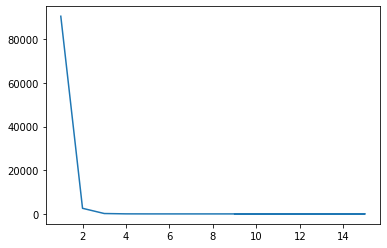

In [69]:
rfm.frequency.value_counts().plot()

Думаю, правильнее выделить следующие группы:
- 1 заказ
- 2-3 заказа
- 4 и более заказов

Для остальных признаков можно использовать метод quantile для деления на кластеры

In [70]:
quintiles = rfm[['recency', 'monetary']].quantile([.3, .6]).to_dict()
quintiles

{'recency': {0.3: 134.0, 0.6: 268.0}, 'monetary': {0.3: 52.98, 0.6: 109.9}}

Напишем функции для определения рангов

In [71]:
# For recency:

def r_score(x):
    if x <= quintiles['recency'][.3]:
        return 3
    elif x <= quintiles['recency'][.6]:
        return 2
    else:
        return 1

In [72]:
# For monetary:

def m_score(x):
    if x <= quintiles['monetary'][.3]:
        return 1
    elif x <= quintiles['monetary'][.6]:
        return 2
    else:
        return 3  

In [73]:
# For frequency:

def f_score(x):
    if x == 1:
        return 1
    elif x == 2 or x == 3:
        return 2
    else:
        return 3 

И теперь на основе этих функций создаем новые признаки

In [74]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [75]:
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,3,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,1,1
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,1,1,3
...,...,...,...,...,...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00,1,1,3
93333,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,1,2
93334,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,2
93335,ffff5962728ec6157033ef9805bacc48,119,1,115.00,3,1,3


Теперь объеденим их в один общий признак сегмента

In [76]:
rfm['rfm_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,1,1,3,113
...,...,...,...,...,...,...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00,1,1,3,113
93333,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,1,2,212
93334,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,2,112
93335,ffff5962728ec6157033ef9805bacc48,119,1,115.00,3,1,3,313


Сгруппируем по новому признаку и посчитаем, сколько клиентов в каждом

In [77]:
rfm_by_rfmscore = rfm.groupby('rfm_score', as_index=False)\
.agg({'customer_unique_id':'count'})
rfm_by_rfmscore

,rfm_score,customer_unique_id
0,111,11129
1,112,11301
2,113,13534
3,121,66
4,122,199
5,123,707
6,131,1
7,132,2
8,133,5
9,211,8528


Мы получили 23 сегмента. Имеет смысл немного объеденить их в группы. Например, так:
1. leaving:
    - 111, 112 и 113 - leaving_disposable - одноразовые
    - 121, 122 и 123 -leaving_rare - уходящие и редкие
    - 131,  132 и 133 - leaving_permanent - уходящие постоянные
 

2. sleeping:
    - 211, 212 и 213 - sleeping_disposable- разовые 
    - 221,222 и 223 - sleeping_rare - редкие 
    - 233 - sleeping_permanent- постоянные

3. permanent:
    - 311,312 и 313 - permanent_new - новички 
    - 321 и 322 - permanent_rare_econom - постоянные с маленьким чеком
    - 323 - permanent_rare_vip -постоянные с нормальным чеком
    - 333 - VIP - лучшие 

Итого у нас осталось 10 групп. Это уже можно визуализировать

In [78]:
def segm(x):
    if x in ('111', '112', '113'):
        return 'leaving_disposable'
    elif x in ('121', '122', '123'):
        return 'leaving_rare'
    elif x in ('131',  '132', '133'):
        return 'leaving_permanent'
    elif x in ('211', '212', '213'):
        return 'sleeping_disposable'
    elif x in ('221', '222', '223'):
        return 'sleeping_rare'
    elif x == '233':
        return 'sleeping_permanent'
    elif x in ('311', '312', '313'):
        return 'permanent_new'
    elif x in ('321', '322'):
        return 'permanent_rare_econom'
    elif x == '323':
        return 'permanent_rare_vip'
    else:
        return 'VIP'

In [79]:
rfm['segment'] = rfm['rfm_score'].apply(lambda x: segm(x))
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,rfm_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,3,1,3,313,permanent_new
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3,1,1,311,permanent_new
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112,leaving_disposable
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,1,1,1,111,leaving_disposable
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,1,1,3,113,leaving_disposable
...,...,...,...,...,...,...,...,...,...
93332,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00,1,1,3,113,leaving_disposable
93333,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,1,2,212,sleeping_disposable
93334,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,2,112,leaving_disposable
93335,ffff5962728ec6157033ef9805bacc48,119,1,115.00,3,1,3,313,permanent_new


Сгруппируем по сегменту и посчитаем, сколько получилось

In [80]:
rfm_by_segment = rfm.groupby('segment', as_index=False)\
.agg({'customer_unique_id':'count'})\
.rename(columns={'customer_unique_id':'customers'})
rfm_by_segment

,segment,customers
0,VIP,25
1,leaving_disposable,35964
2,leaving_permanent,8
3,leaving_rare,972
4,permanent_new,27195
5,permanent_rare_econom,204
6,permanent_rare_vip,695
7,sleeping_disposable,27378
8,sleeping_permanent,14
9,sleeping_rare,882


Визуализируем результат

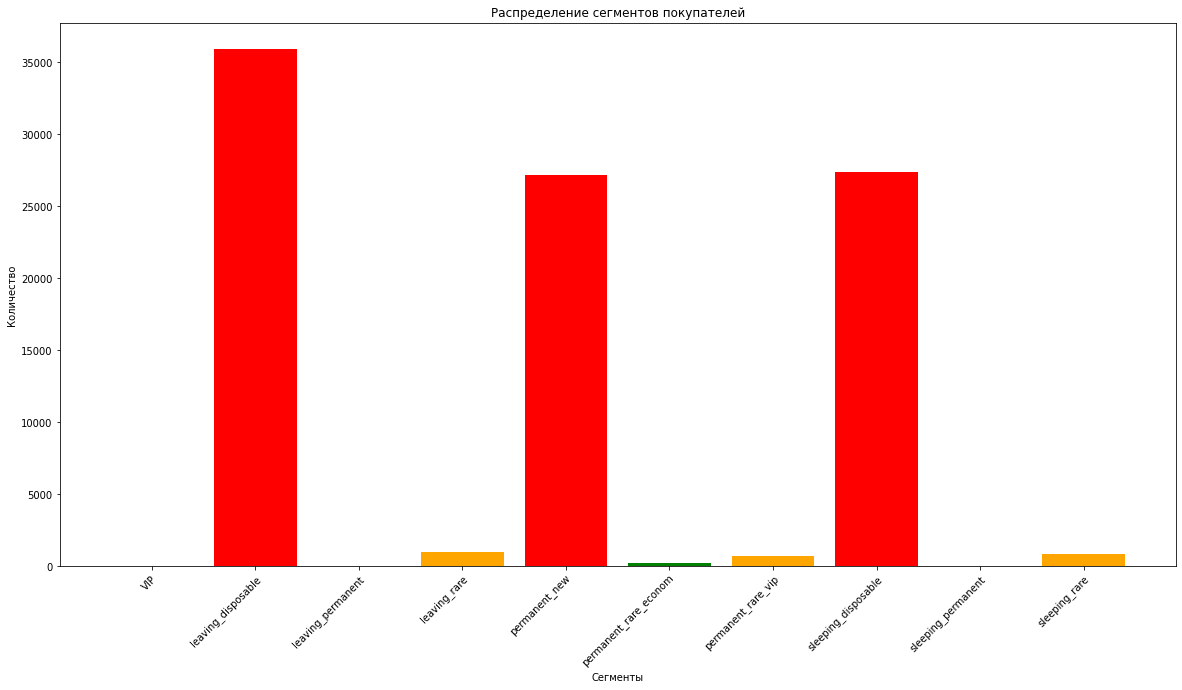

In [81]:
plt.figure(figsize=(20, 10))
plt.bar(rfm_by_segment.segment, rfm_by_segment['customers'], color=['orange', 'red', 'green'])
plt.xticks(rotation=45, ha='right', rotation_mode="anchor")
plt.xlabel('Сегменты')
plt.ylabel('Количество')
plt.title('Распределение сегментов покупателей');

Не могу быть уверенной, что сегментация проведена верно. Но в целом видно, что из-за того, что бОльшая часть покупателей приобрели товар лишь однажды, у нас такие огромныe сегменты одноразовых и новичков. 

Не зная специфики товара, сложно сделать вывод. Но тут только два варианта:
- товар не нужен часто (может быть, это бытовая техника, например)
- мы плохо работаем и клиенты редко возвращаются.

